In [1]:
from statistics import mean, stdev, median
from typing import List, Dict

from matplotlib import pyplot as plt

from src.data.processing import load_texts, filter_punctuations
from src.data.vocab import Vocab, GRAVE_ACCENT, ACUTE_ACCENT, TILDE_ACCENT
from src.paths import DATA_DIR

In [2]:
def sort_vocab_freq(vocab: Vocab) -> Dict:
    return dict(sorted(vocab.token_freq.items(), key=lambda item: item[1], reverse=True))


def summary(texts: List[str]) -> None:
    vocab = Vocab.init_from_texts(texts)

    words = [word for text in texts for word in filter_punctuations(text).split()]
    word_counts_per_text = [len(filter_punctuations(text).split()) for text in texts]
    character_counts_per_text = [len(text) for text in texts]
    character_counts_per_word = [len(word) for word in words]

    num_grave = vocab.token_freq[GRAVE_ACCENT]
    num_acute = vocab.token_freq[ACUTE_ACCENT]
    num_tilde = vocab.token_freq[TILDE_ACCENT]
    num_accent_marks = num_grave + num_acute + num_tilde

    print(f"""
    Word statistics (Per Text):
        Total:  {sum(word_counts_per_text):>10}
        Unique: {len(set(words)):>10}
        Mean:   {mean(word_counts_per_text) if len(word_counts_per_text) > 0 else 0:>10.2f}
        STD:    {stdev(word_counts_per_text) if len(word_counts_per_text) > 1 else 0:>10.2f}
        Median: {median(word_counts_per_text) if len(word_counts_per_text) > 0 else 0:>10.2f}
        Min:    {min(word_counts_per_text) if len(word_counts_per_text) > 0 else 0:>10}
        Max:    {max(word_counts_per_text) if len(word_counts_per_text) > 0 else 0:>10}

    Character statistics (Per Text):
        Total:  {sum(character_counts_per_text):>10}
        Mean:   {mean(character_counts_per_text) if len(character_counts_per_text) > 0 else 0:>10.2f}
        STD:    {stdev(character_counts_per_text) if len(character_counts_per_text) > 1 else 0:>10.2f}
        Median: {median(character_counts_per_text) if len(character_counts_per_text) > 0 else 0:>10.2f}
        Min:    {min(character_counts_per_text) if len(character_counts_per_text) > 0 else 0:>10}
        Max:    {max(character_counts_per_text) if len(character_counts_per_text) > 0 else 0:>10}

    Character statistics (Per Word):
        Total:  {sum(character_counts_per_word):>10}
        Mean:   {mean(character_counts_per_word) if len(character_counts_per_word) > 0 else 0:>10.2f}
        STD:    {stdev(character_counts_per_word) if len(character_counts_per_word) > 1 else 0:>10.2f}
        Median: {median(character_counts_per_word) if len(character_counts_per_word) > 0 else 0:>10.2f}
        Min:    {min(character_counts_per_word) if len(character_counts_per_word) > 0 else 0:>10}
        Max:    {max(character_counts_per_word) if len(character_counts_per_word) > 0 else 0:>10}

    Stress statistics:
        Total:               {num_accent_marks:>10}
        Grave accent marks:  {num_grave:>10}  {num_grave / num_accent_marks:>10.2%}
        Acute accent marks:  {num_acute:>10}  {num_acute / num_accent_marks:>10.2%}
        Tilde accent marks:  {num_tilde:>10}  {num_tilde / num_accent_marks:>10.2%}

    Vocab size: {len(vocab)}
    Vocab frequencies: {sort_vocab_freq(vocab)}
    """)

    plt.figure(figsize=(10, 6))
    plt.hist(word_counts_per_text, bins=30, edgecolor="black", alpha=0.75)
    plt.xlabel("Word Count per Sample")
    plt.ylabel("Frequency")
    plt.title("Distribution of Word Counts")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(character_counts_per_text, bins=50, edgecolor="black", alpha=0.75)
    plt.xlabel("Character Count per Sample")
    plt.ylabel("Frequency")
    plt.title("Distribution of Character Counts")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(character_counts_per_word, bins=15, edgecolor="black", alpha=0.75)
    plt.xlabel("Character Count per Word")
    plt.ylabel("Frequency")
    plt.title("Distribution of Character Counts")
    plt.grid(True)
    plt.show()

In [3]:
train_texts = load_texts(DATA_DIR / "train.txt")
val_texts = load_texts(DATA_DIR / "val.txt")
test_texts = load_texts(DATA_DIR / "test.txt")
all_texts = train_texts + val_texts + test_texts

print(f"""
All samples:        {len(all_texts):>10}
Train samples:      {len(train_texts):>10} {len(train_texts) / len(all_texts):>10.2%}
Val samples:        {len(val_texts):>10} {len(val_texts) / len(all_texts):>10.2%}
Test samples:       {len(test_texts):>10} {len(test_texts) / len(all_texts):>10.2%}
""")


All samples:             56444
Train samples:           45963     81.43%
Val samples:              8178     14.49%
Test samples:             2303      4.08%



In [4]:
source_vocab = Vocab.init_source_vocab(train_texts)
target_vocab = Vocab.init_target_vocab(train_texts)

print(f"""
Source vocab size: {len(source_vocab)}
Token-to-ID: {source_vocab.token_to_id}
Token frequency: {sort_vocab_freq(source_vocab)}

Target vocab size: {len(target_vocab)}
Token-to-ID: {target_vocab.token_to_id}
Token frequency: {sort_vocab_freq(target_vocab)}
""")


Source vocab size: 47
Token-to-ID: {'*': 0, '#': 1, '<': 2, '>': 3, 'š': 4, 'i': 5, 'o': 6, 's': 7, ' ': 8, 'f': 9, 'u': 10, 'n': 11, 'k': 12, 'c': 13, 'j': 14, 'a': 15, 'p': 16, 'm': 17, 't': 18, 'ą': 19, 'r': 20, 'e': 21, 'g': 22, '.': 23, '-': 24, 'd': 25, 'ė': 26, ',': 27, 'v': 28, 'l': 29, 'į': 30, 'ę': 31, 'ū': 32, 'ž': 33, 'b': 34, '?': 35, 'č': 36, 'y': 37, ':': 38, 'z': 39, 'ų': 40, '"': 41, 'h': 42, ';': 43, '!': 44, '(': 45, ')': 46}
Token frequency: {' ': 385041, 'i': 317962, 'a': 289216, 's': 187065, 't': 143785, 'e': 131713, 'o': 128231, 'r': 123135, 'k': 118899, 'n': 118661, 'u': 116492, 'm': 75424, 'p': 70490, 'l': 70450, 'd': 64151, 'v': 56372, 'j': 55415, ',': 49910, 'g': 49441, 'ė': 47405, '.': 39784, 'š': 37702, 'b': 35664, 'y': 28602, 'ž': 24039, 'ų': 21163, 'ą': 20879, 'į': 17540, '-': 17376, 'ū': 12590, 'č': 9921, '?': 8718, 'ę': 7376, '"': 5895, 'z': 3644, 'f': 3359, 'c': 2750, ':': 2084, 'h': 2068, '!': 1678, ';': 969, '(': 208, ')': 197, '*': 0, '#': 0, '<': 

ALL DATA SUMMARY

    Word statistics (Per Text):
        Total:      510513
        Unique:      75762
        Mean:         9.04
        STD:          5.88
        Median:       8.00
        Min:             1
        Max:            31

    Character statistics (Per Text):
        Total:     4085775
        Mean:        72.39
        STD:         47.50
        Median:      60.00
        Min:             5
        Max:           200

    Character statistics (Per Word):
        Total:     3454526
        Mean:         6.77
        STD:          2.81
        Median:       7.00
        Min:             2
        Max:            23

    Stress statistics:
        Total:                   510513
        Grave accent marks:      175475      34.37%
        Acute accent marks:      114157      22.36%
        Tilde accent marks:      220881      43.27%

    Vocab size: 50
    Vocab frequencies: {' ': 474931, 'i': 390576, 'a': 356282, 's': 230600, '̃': 220881, 't': 175487, '̀': 175475, 'e': 1

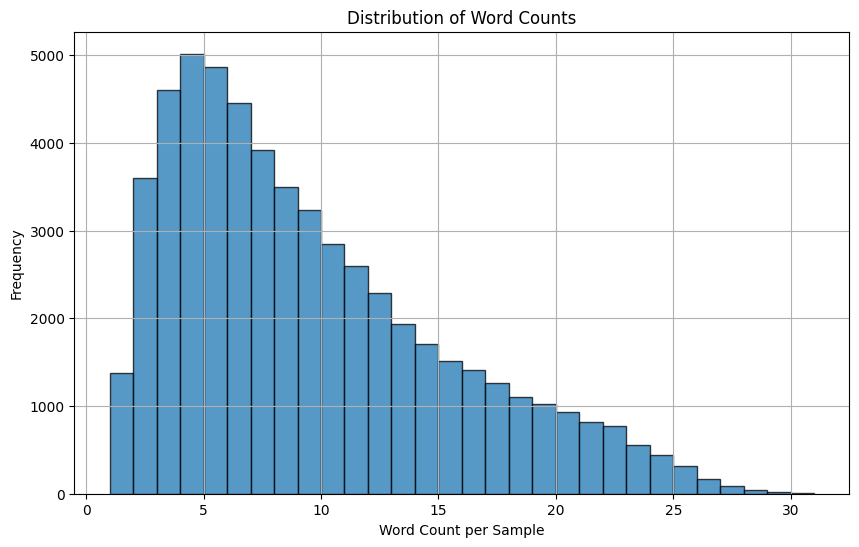

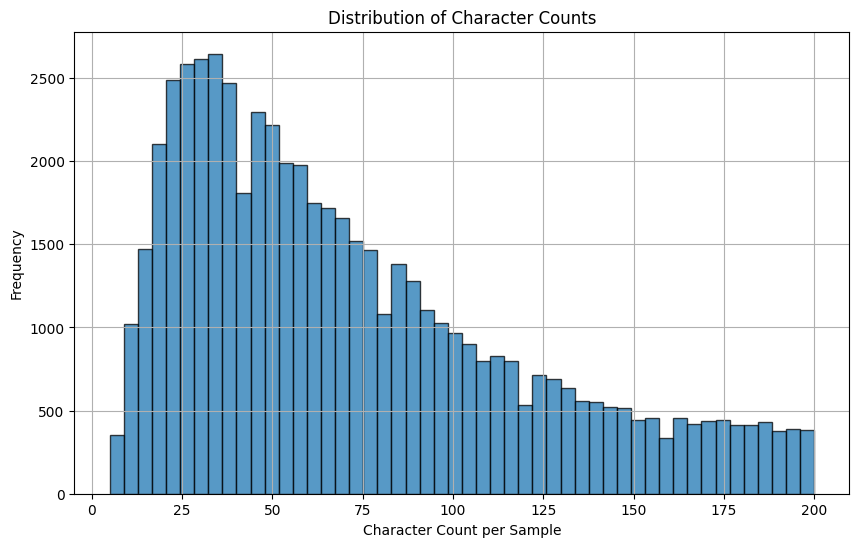

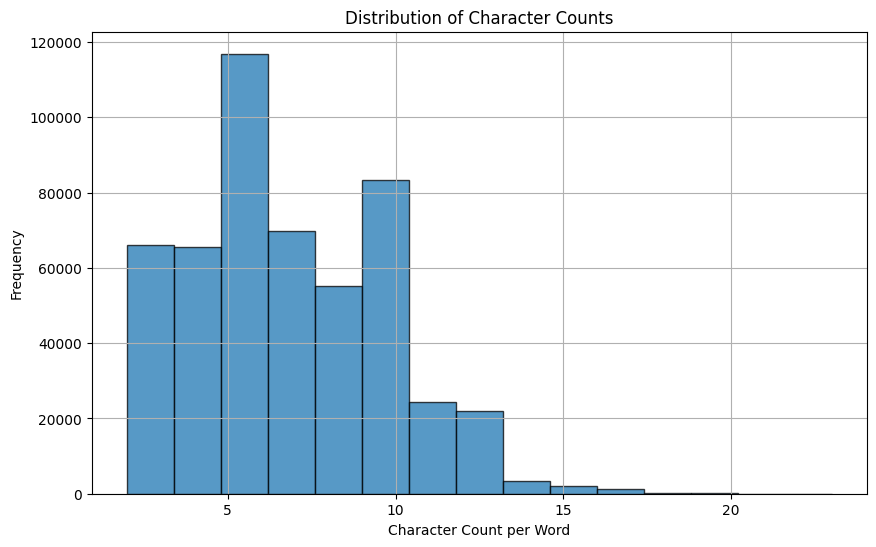

In [5]:
print("ALL DATA SUMMARY")
summary(all_texts)

TRAIN DATA SUMMARY

    Word statistics (Per Text):
        Total:      413872
        Unique:      65579
        Mean:         9.00
        STD:          5.85
        Median:       8.00
        Min:             1
        Max:            31

    Character statistics (Per Text):
        Total:     3317336
        Mean:        72.17
        STD:         47.39
        Median:      60.00
        Min:             5
        Max:           200

    Character statistics (Per Word):
        Total:     2805476
        Mean:         6.78
        STD:          2.82
        Median:       7.00
        Min:             2
        Max:            23

    Stress statistics:
        Total:                   413872
        Grave accent marks:      143258      34.61%
        Acute accent marks:       92571      22.37%
        Tilde accent marks:      178043      43.02%

    Vocab size: 50
    Vocab frequencies: {' ': 385041, 'i': 317962, 'a': 289216, 's': 187065, '̃': 178043, 't': 143785, '̀': 143258, 'e':

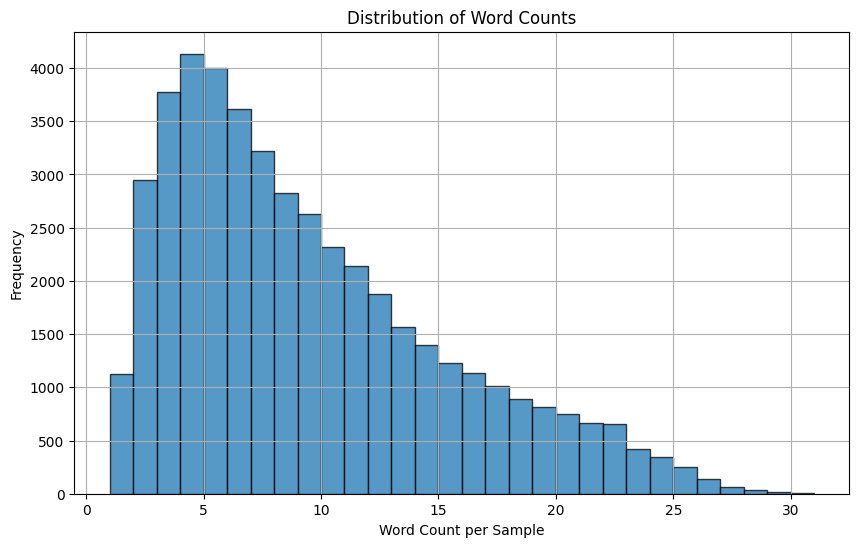

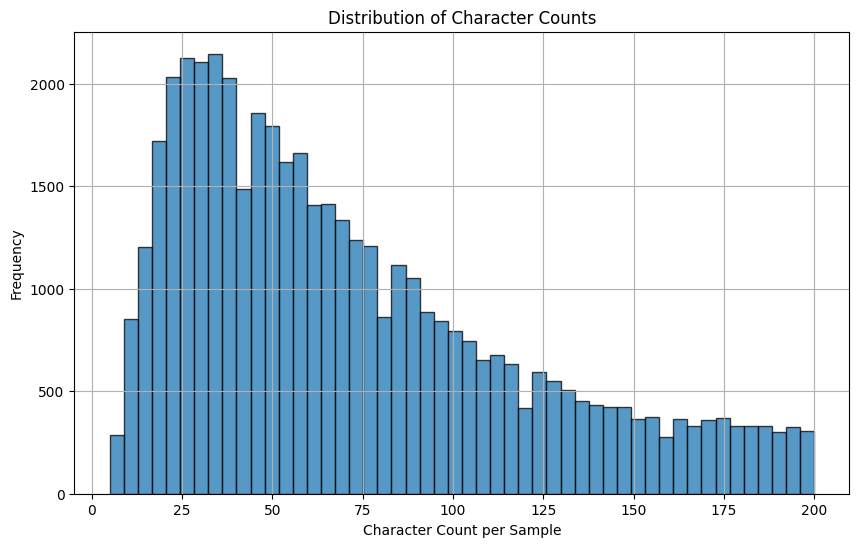

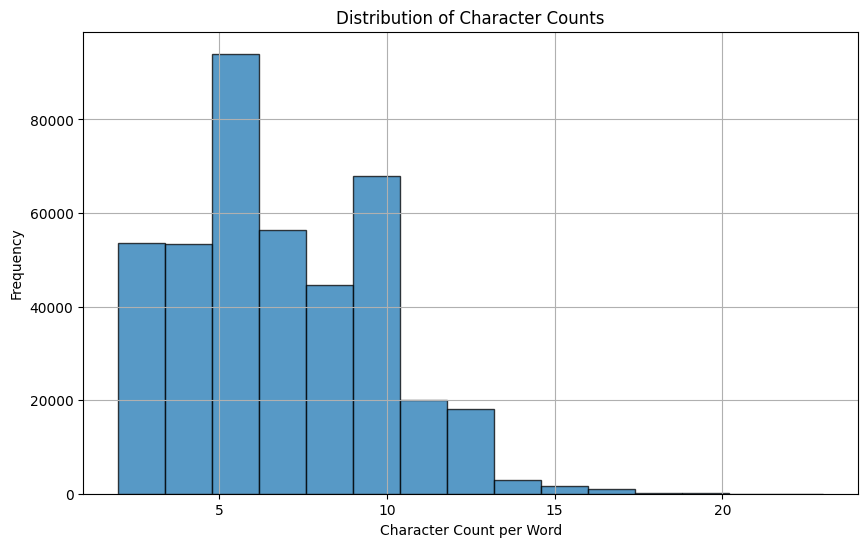

In [6]:
print("TRAIN DATA SUMMARY")
summary(train_texts)

VALIDATION DATA SUMMARY

    Word statistics (Per Text):
        Total:       73658
        Unique:      22780
        Mean:         9.01
        STD:          5.85
        Median:       8.00
        Min:             1
        Max:            29

    Character statistics (Per Text):
        Total:      588609
        Mean:        71.97
        STD:         47.28
        Median:      59.00
        Min:             5
        Max:           200

    Character statistics (Per Word):
        Total:      497524
        Mean:         6.75
        STD:          2.81
        Median:       7.00
        Min:             2
        Max:            23

    Stress statistics:
        Total:                    73658
        Grave accent marks:       25207      34.22%
        Acute accent marks:       16385      22.24%
        Tilde accent marks:       32066      43.53%

    Vocab size: 50
    Vocab frequencies: {' ': 68483, 'i': 56107, 'a': 51349, 's': 33133, '̃': 32066, '̀': 25207, 't': 25076, 'e': 2

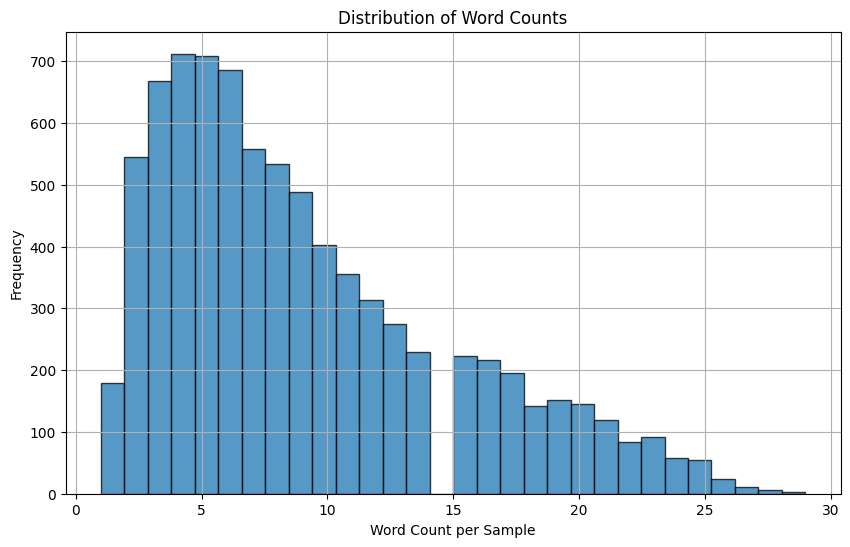

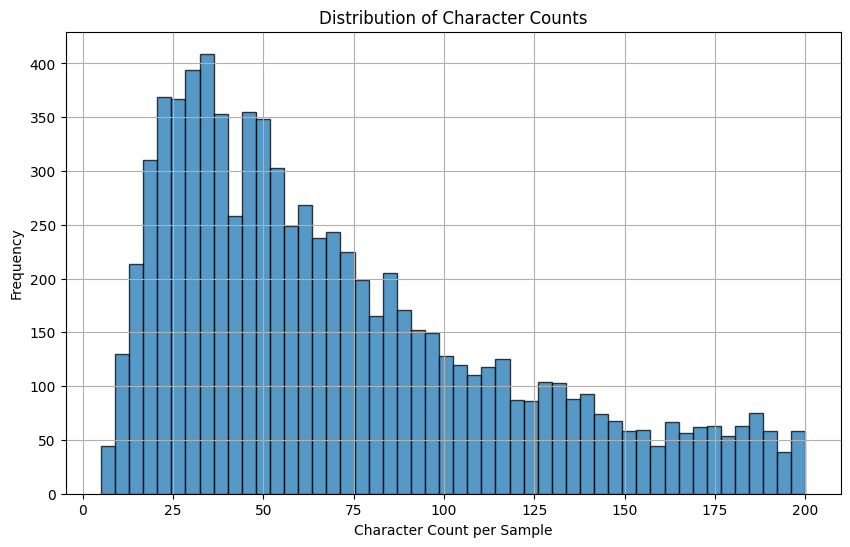

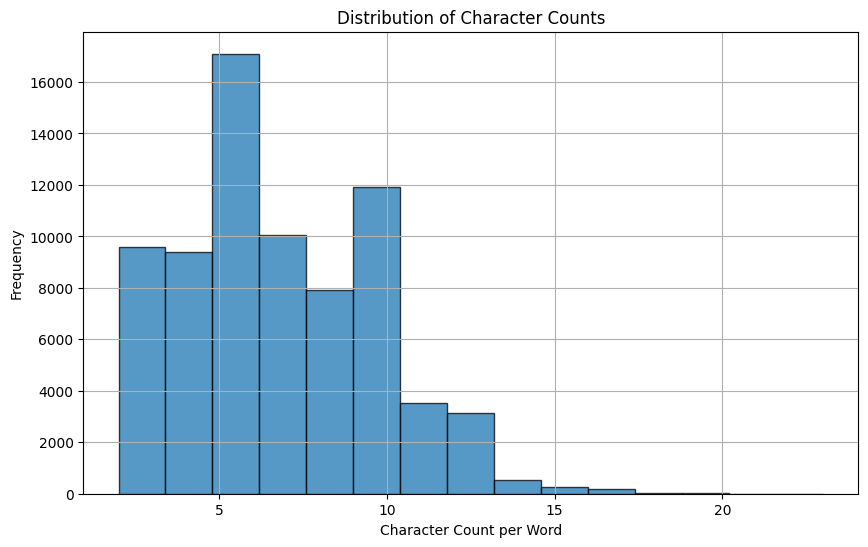

In [7]:
print("VALIDATION DATA SUMMARY")
summary(val_texts)

TEST DATA SUMMARY

    Word statistics (Per Text):
        Total:       22983
        Unique:       9277
        Mean:         9.98
        STD:          6.37
        Median:       9.00
        Min:             1
        Max:            29

    Character statistics (Per Text):
        Total:      179830
        Mean:        78.09
        STD:         50.07
        Median:      68.00
        Min:             5
        Max:           200

    Character statistics (Per Word):
        Total:      151526
        Mean:         6.59
        STD:          2.61
        Median:       6.00
        Min:             2
        Max:            18

    Stress statistics:
        Total:                    22983
        Grave accent marks:        7010      30.50%
        Acute accent marks:        5201      22.63%
        Tilde accent marks:       10772      46.87%

    Vocab size: 49
    Vocab frequencies: {' ': 21407, 'i': 16507, 'a': 15717, '̃': 10772, 's': 10402, 'u': 7066, '̀': 7010, 'e': 6826, 't'

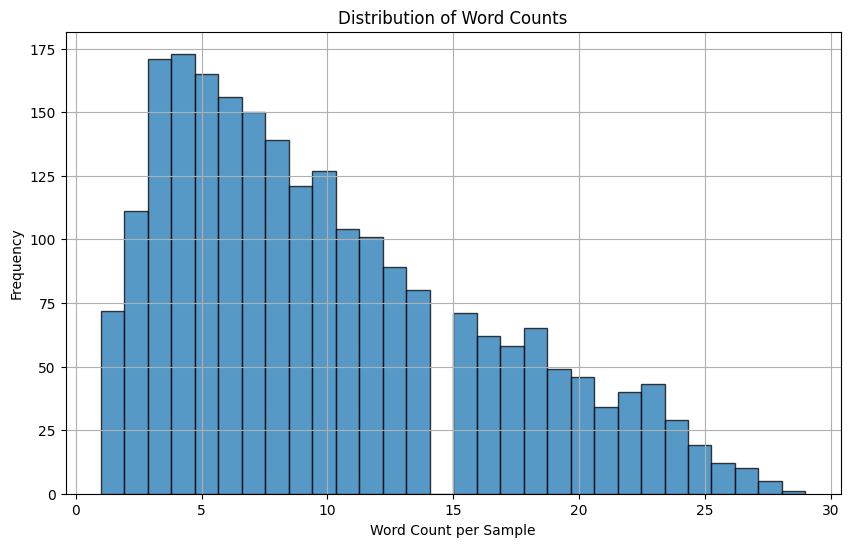

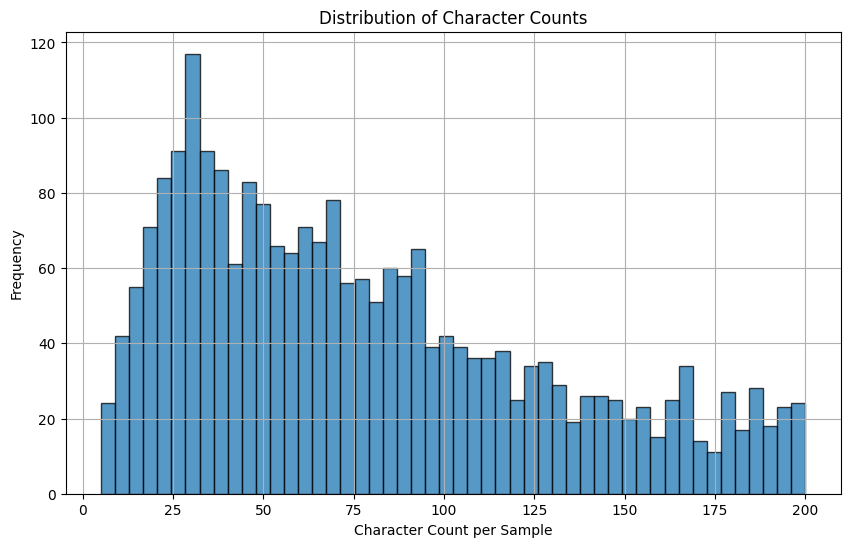

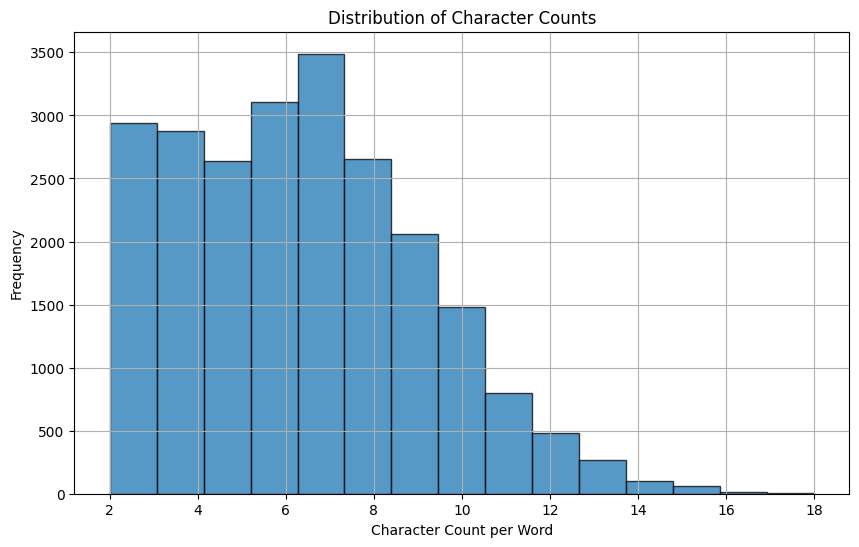

In [8]:
print("TEST DATA SUMMARY")
summary(test_texts)